In [1]:
# compare Wald test and likelihood ratio test

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
df=pd.read_csv('penguins.csv')

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


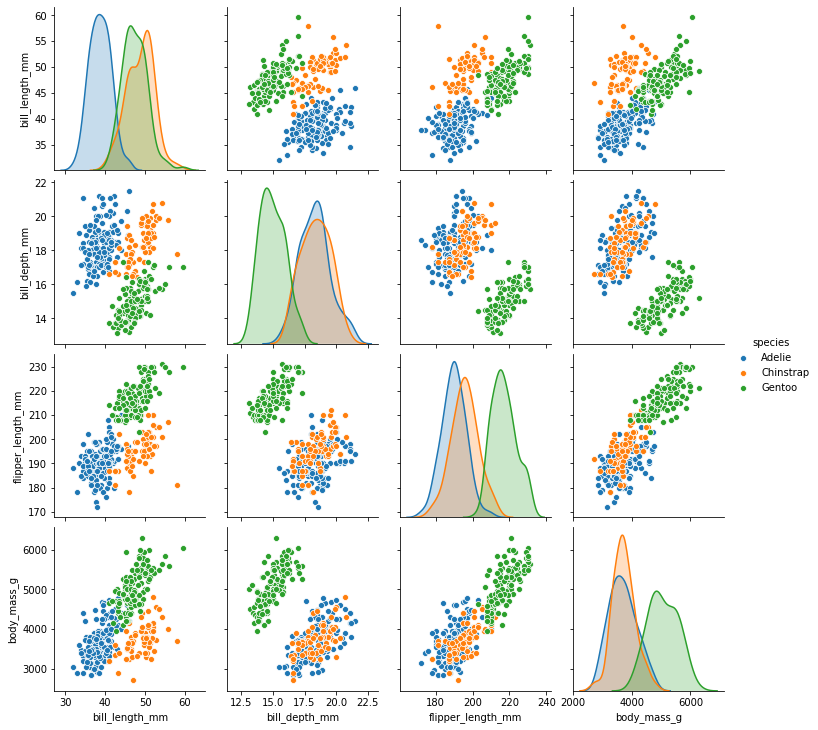

In [5]:
sns.pairplot(data=df, hue='species')

In [6]:
# wald test vs LRT, single hypothesis
full_model=smf.ols(formula='bill_length_mm ~ flipper_length_mm + body_mass_g + sex + bill_depth_mm', data=df).fit()
rest_model=smf.ols(formula='bill_length_mm ~ flipper_length_mm + body_mass_g + sex', data=df).fit()

In [7]:
WT=full_model.wald_test('bill_depth_mm')
LRT=full_model.compare_lr_test(rest_model)

In [8]:
WT  # wald test result

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.18213991]]), p=0.07537157071505104, df_denom=328, df_num=1>

In [9]:
LRT  # LRT result

(3.215077469122207, 0.07296273747414175, 1.0)

In [11]:
# result: p-value from LRT was lower than Wald (0.0729 vs 0.0753)

In [12]:
# wald test vs LRT, joint hypothesis
rest_model=smf.ols(formula='bill_length_mm ~ flipper_length_mm + sex', data=df).fit()

In [13]:
WT=full_model.f_test('bill_depth_mm = body_mass_g = 0')
LRT=full_model.compare_lr_test(rest_model)

In [14]:
WT  # wald test result

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.16751425]]), p=0.11609857248330752, df_denom=328, df_num=2>

In [15]:
LRT  # LRT result

(4.372281240339589, 0.11234951242239384, 2.0)

In [16]:
# result: in the case of joint linear hypothesis, 
#         p-value from LRT was also lower than Wald (0.1123 vs 0.1160)

In [ ]:
# from this, we can understand that LRT is more powerful than Wald test